In [4]:
import yfinance as yf 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

In [19]:
# constants
today = '2022-01-01'
ticker_dct = {
    'PETR4.SA' : ['2015-01-01',today],
    'VALE3.SA' : ['2015-01-01',today],
    'BBDC4.SA' : ['2015-01-01',today],
    'ITUB4.SA' : ['2015-01-01',today],
    'MGLU3.SA' : ['2015-01-01',today],
    'BBAS3.SA' : ['2015-01-01',today]
}

In [20]:
def fetch_stock_data(ticker_dct):
    '''
    This function will fetch stock data through the yahoo finance
    stock api.
    The ticker_dct will be of the following format : 
        - Key -> Ticker 
        - Values -> Start date, end date of the stock data
    
    params:
        ticker_dct (Dictionary) : The stocks you want to fetch the data for
        
    returns:
        This funciton will return a dictionary, the key will be the ticker
        and the value will be the data associated to that ticker over the
        specified user time period
    '''
    
    for k,v in ticker_dct.items():
        ticker_dct[k] = yf.download(k, v[0], v[1])
    return ticker_dct

In [21]:
dfs = fetch_stock_data(ticker_dct)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Find Stocks Similar to PETR4.SA

In [22]:
def visualize_close_prices(dfs):
    '''
    This function will visualize the closing prices associated
    to a given input dataframe
    '''
    for k,v in dfs.items():
        plt.title(k)
        v.Close.plot()
        plt.show()

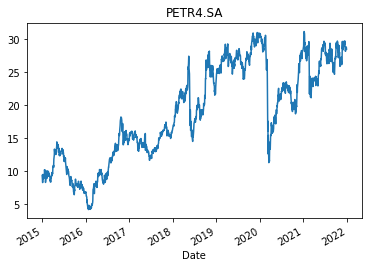

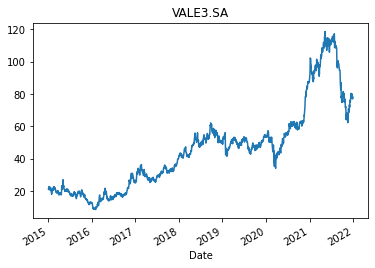

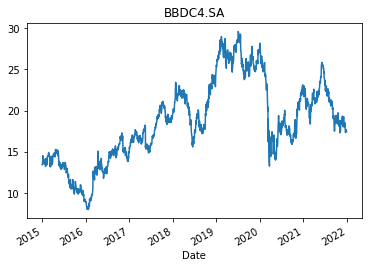

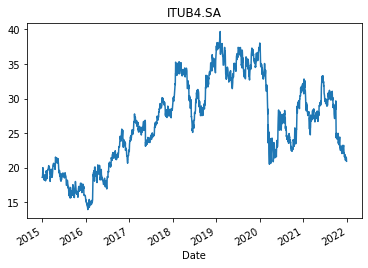

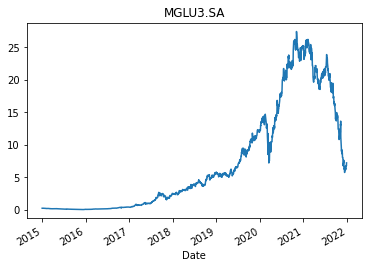

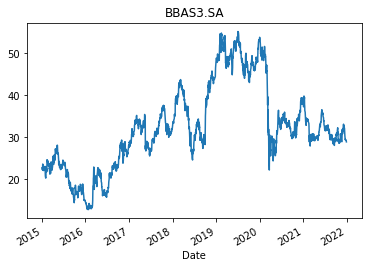

In [23]:
visualize_close_prices(dfs)

# Find Stocks Similar to PETR4.SA

In [24]:
# benchmark the dates to start from 0
for ticker, df in dfs.items():
    dates = df.index.values
    date_map = {date:idx for idx, date in enumerate(dates)}
    
    dfs[ticker]['benchmark_date'] = dfs[ticker].index.map(date_map)

In [27]:
shop_df = dfs['PETR4.SA']

In [28]:
distances = {}
for k,v in dfs.items():
    if k != 'SHOP':
        max_d = v['benchmark_date'].max()
        benchmark = np.array(shop_df[shop_df['benchmark_date'].between(0, max_d)]['Close'].values)
        
        y = np.array(v.Close.values)
        d,p = fastdtw(benchmark, y)
        distances[k] = d

In [29]:
distances

{'PETR4.SA': 0.0,
 'VALE3.SA': 37888.909994125366,
 'BBDC4.SA': 2717.7438077926636,
 'ITUB4.SA': 6507.773601531982,
 'MGLU3.SA': 7652.675056774169,
 'BBAS3.SA': 13333.459913253784}